In [124]:
import numpy as np
import pandas as pd
import os



In [125]:
lista_de_arquivos = os.listdir("/home/otavio/Área de Trabalho/Sara_dataset")

In [126]:
label_map = {
        "Situação referencia index": 0,
        "Situação rolo 3 da esquerda levantado index": 1,
        "Situação rolo 3 da esquerda removido index": 2,
        "Situação rolo 3 da direita levantado index": 3,
        "Situação rolo 3 da direita removido index": 4,
    }



In [127]:
from aeon.classification.feature_based import Catch22Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [128]:
cat22 = Catch22Classifier(features='all', catch24=True, outlier_norm=False, replace_nans=True, use_pycatch22=False, estimator=None, random_state=None, n_jobs=1, parallel_backend=None)

In [129]:
casos = []
labels = []


In [130]:
for i in lista_de_arquivos:
    for j in label_map:
        if(j in i):
            labels.append(label_map[j])
            df = pd.read_csv(f"Sara_dataset/{i}")
            X = df.drop(df.columns[0], axis=1)
            X = X['Gyroscope X']
            casos.append(X)


            
                        

In [131]:
casos = np.array(casos)

In [132]:
from sklearn.model_selection import train_test_split
from aeon.classification.feature_based import Catch22Classifier
from sklearn import metrics

X_treino, X_teste, y_treino, y_teste = train_test_split(casos, labels, test_size=0.25, random_state=42)

In [133]:
cat22.fit(X_treino, np.array(y_treino))

Catch22Classifier()

In [134]:
c22f_preds = cat22.predict(X_teste)
print("C22F Accuracy: " + str(metrics.accuracy_score(y_teste, c22f_preds)))

C22F Accuracy: 0.8205128205128205


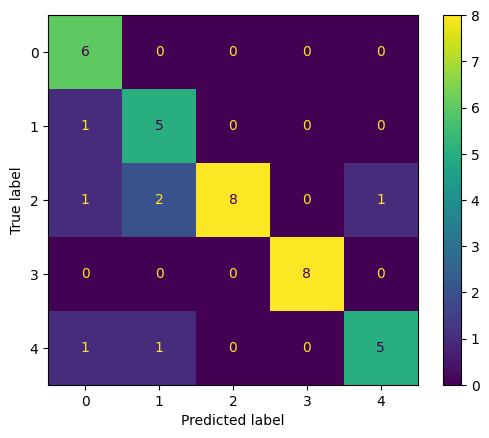

In [135]:
cm = confusion_matrix(y_teste, c22f_preds, labels=[0,1,2,3,4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=[0,1,2,3,4])

disp.plot()
plt.show()

In [136]:
from aeon.classification.convolution_based import RocketClassifier
from sklearn.model_selection import train_test_split

In [137]:
casos = []
labels = []


In [138]:
for i in lista_de_arquivos:
    for j in label_map:
        if(j in i):
            labels.append(label_map[j])
            df = pd.read_csv(f"Sara_dataset/{i}")
            X = df.drop(df.columns[0], axis=1)
            X = X['Gyroscope X']
            casos.append(X)


            
                        

In [139]:
casos = np.array(casos)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(
    casos, labels, test_size=0.25, random_state=0)

In [141]:
clf = RocketClassifier(num_kernels=1000)
clf.fit(np.array(X_train), np.array(y_train))

y_pred = clf.predict(X_test)

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8461538461538461

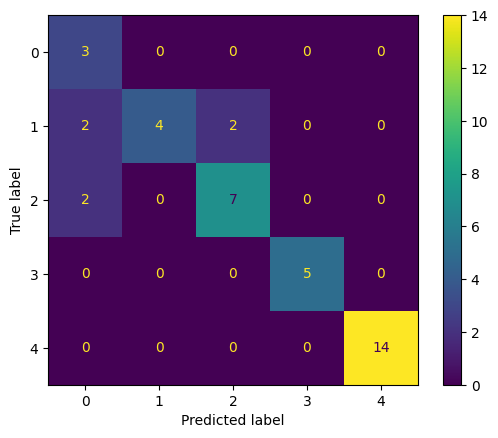

In [143]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=[0,1,2,3,4])

disp.plot()
plt.show()